#Exploratory Data Analysis and Data Preprocessing

In [1]:
 #Step-1: Importing libraries and datasets

# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

df = pd.read_csv("customer_data.csv")

df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


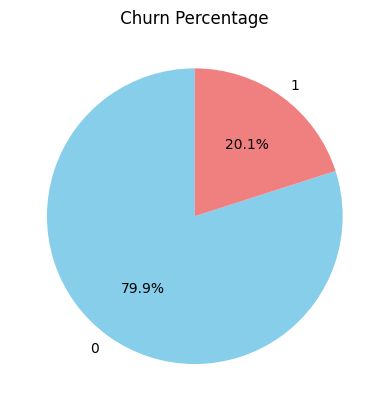

In [ ]:
# Count the occurrences of 1s and 0s in the column
value_counts = df['Churn'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Add a title
plt.title(' Churn Percentage ')

# Display the pie chart
plt.show()

In [ ]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through each categorical column
for column in categorical_columns:
    # Print the column name and the number of unique classes
    print(f"Column: {column}")
    print(f"Number of unique classes: {df[column].nunique()}")

    # Print the value counts for each unique class
    print("Value counts:")
    print(df[column].value_counts())

    # Add a separator for better readability
    print("-" * 30)


Column: Purchase Date
Number of unique classes: 249728
Value counts:
2020-10-16 09:27:42    2
2022-05-21 15:16:11    2
2022-08-23 06:11:36    2
2021-02-15 07:41:07    2
2021-10-19 09:34:53    2
                      ..
2022-09-30 22:19:12    1
2021-03-26 12:51:31    1
2020-10-26 12:56:31    1
2023-04-19 15:01:54    1
2020-09-07 05:12:19    1
Name: Purchase Date, Length: 249728, dtype: int64
------------------------------
Column: Product Category
Number of unique classes: 4
Value counts:
Electronics    62630
Clothing       62581
Home           62542
Books          62247
Name: Product Category, dtype: int64
------------------------------
Column: Payment Method
Number of unique classes: 3
Value counts:
Credit Card    83547
PayPal         83441
Cash           83012
Name: Payment Method, dtype: int64
------------------------------
Column: Customer Name
Number of unique classes: 39878
Value counts:
Michael Johnson       119
Michael Smith         116
Michael Brown         106
Michael Jones   

In [ ]:
# Check data types and missing values
print("Data Types:")
print(df.dtypes)
print("Missing Values:")
print(df.isnull().sum())

Data Types:
Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object
Missing Values:
Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


In [2]:
# Drop unnecessary columns
columns_to_drop = ['Customer ID', 'Customer Name', 'Customer Age'] #Customer age column occured twice, that is why we are dropping one of them
df = df.drop(columns=columns_to_drop)



# Set the 'date_column' as the index (We'll do this later when we do time series analysis)
# first, convert purchase date column into datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])


df




,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender,Churn
0,2023-05-03 21:30:02,Home,177,1,2427,PayPal,1.0,31,Female,0
1,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,1.0,31,Female,0
2,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,1.0,31,Female,0
3,2023-01-17 13:14:36,Electronics,396,3,937,Cash,0.0,31,Female,0
4,2021-05-01 11:29:27,Books,259,4,2598,PayPal,1.0,31,Female,0
...,...,...,...,...,...,...,...,...,...,...
249995,2023-01-24 12:32:18,Home,436,1,3664,Cash,0.0,63,Male,0
249996,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,1.0,66,Female,0
249997,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,NaN,63,Female,0
249998,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,1.0,64,Male,0


In [ ]:
df.describe() # See the descriptive statistics of all the numerical columns

,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,254.742724,3.004936,2725.385196,0.500824,43.798276,0.20052
std,141.738104,1.414737,1442.576095,0.500001,15.364915,0.40039
min,10.000000,1.000000,100.000000,0.000000,18.000000,0.00000
25%,132.000000,2.000000,1476.000000,0.000000,30.000000,0.00000
50%,255.000000,3.000000,2725.000000,1.000000,44.000000,0.00000
75%,377.000000,4.000000,3975.000000,1.000000,57.000000,0.00000
max,500.000000,5.000000,5350.000000,1.000000,70.000000,1.00000


In [4]:
df_1 =df.drop(columns='Purchase Date')
df_1

,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender,Churn
0,Home,177,1,2427,PayPal,1.0,31,Female,0
1,Electronics,174,3,2448,PayPal,1.0,31,Female,0
2,Books,413,1,2345,Credit Card,1.0,31,Female,0
3,Electronics,396,3,937,Cash,0.0,31,Female,0
4,Books,259,4,2598,PayPal,1.0,31,Female,0
...,...,...,...,...,...,...,...,...,...
249995,Home,436,1,3664,Cash,0.0,63,Male,0
249996,Electronics,233,1,4374,Credit Card,1.0,66,Female,0
249997,Electronics,441,5,5296,Cash,NaN,63,Female,0
249998,Electronics,44,2,2517,Cash,1.0,64,Male,0


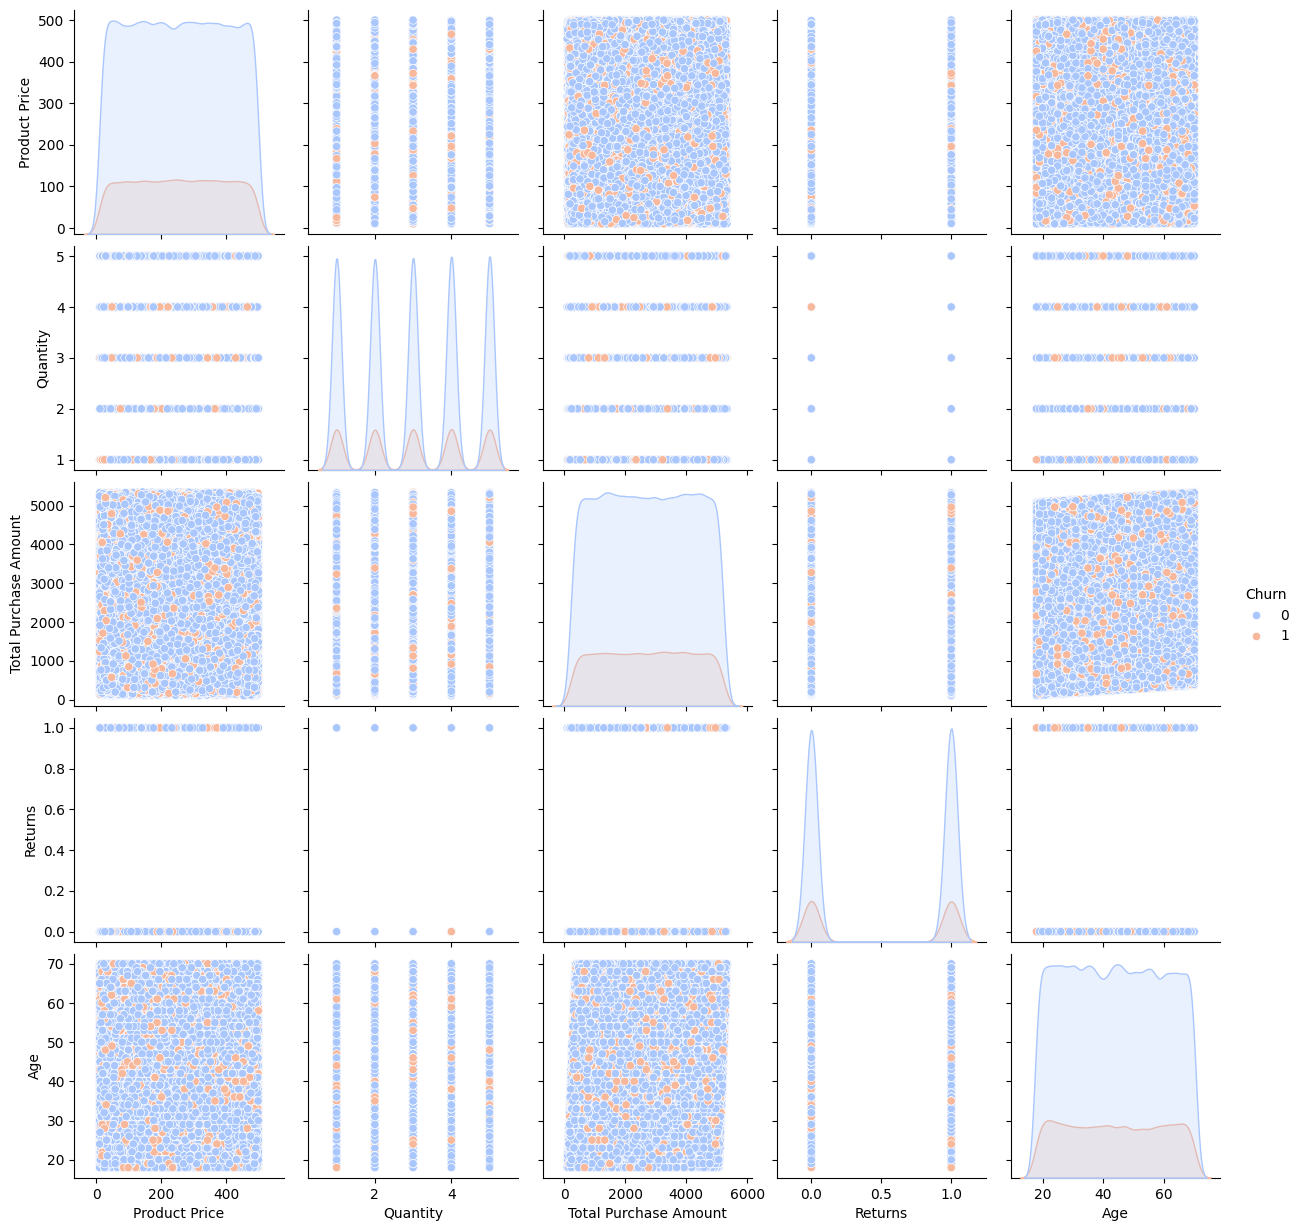

In [45]:
sns.pairplot(df_1, hue='Churn',palette='coolwarm')

# Checking the Groupby Statistics of Customer Churn:

In [ ]:
Churn_Group_Stats = pd.DataFrame(df_1.groupby('Churn').describe().T)
Churn_Group_Stats.to_excel('Customer Churn Group Stats.xlsx', index= True, header=True)

In [ ]:
Churn_Group_Stats

Churn                                    0             1
Product Price         count  199870.000000  50130.000000
                      mean      254.658868    255.077060
                      std       141.945609    140.908649
                      min        10.000000     10.000000
                      25%       132.000000    134.000000
                      50%       255.000000    255.000000
                      75%       377.000000    376.000000
                      max       500.000000    500.000000
Quantity              count  199870.000000  50130.000000
                      mean        3.005894      3.001117
                      std         1.415050      1.413494
                      min         1.000000      1.000000
                      25%         2.000000      2.000000
                      50%         3.000000      3.000000
                      75%         4.000000      4.000000
                      max         5.000000      5.000000
Total Purchase Amount count  199870.000000  50130.000000
                      mean     2724.875439   2727.417614
                      std      1443.221013   1440.014494
                      min       100.000000    101.000000
                      25%      1476.000000   1480.000000
                      50%      2722.000000   2739.000000
                      75%      3977.000000   3963.750000
                      max      5350.000000   5344.000000
Returns               count  161874.000000  40744.000000
                      mean        0.501847      0.496760
                      std         0.499998      0.499996
                      min         0.000000      0.000000
                      25%         0.000000      0.000000
                      50%         1.000000      0.000000
                      75%         1.000000      1.000000
                      max         1.000000      1.000000
Age                   count  199870.000000  50130.000000
                      mean       43.815965     43.727748
                      std        15.327764     15.512107
                      min        18.000000     18.000000
                      25%        30.000000     30.000000
                      50%        44.000000     43.000000
                      75%        57.000000     57.000000
                      max        70.000000     70.000000

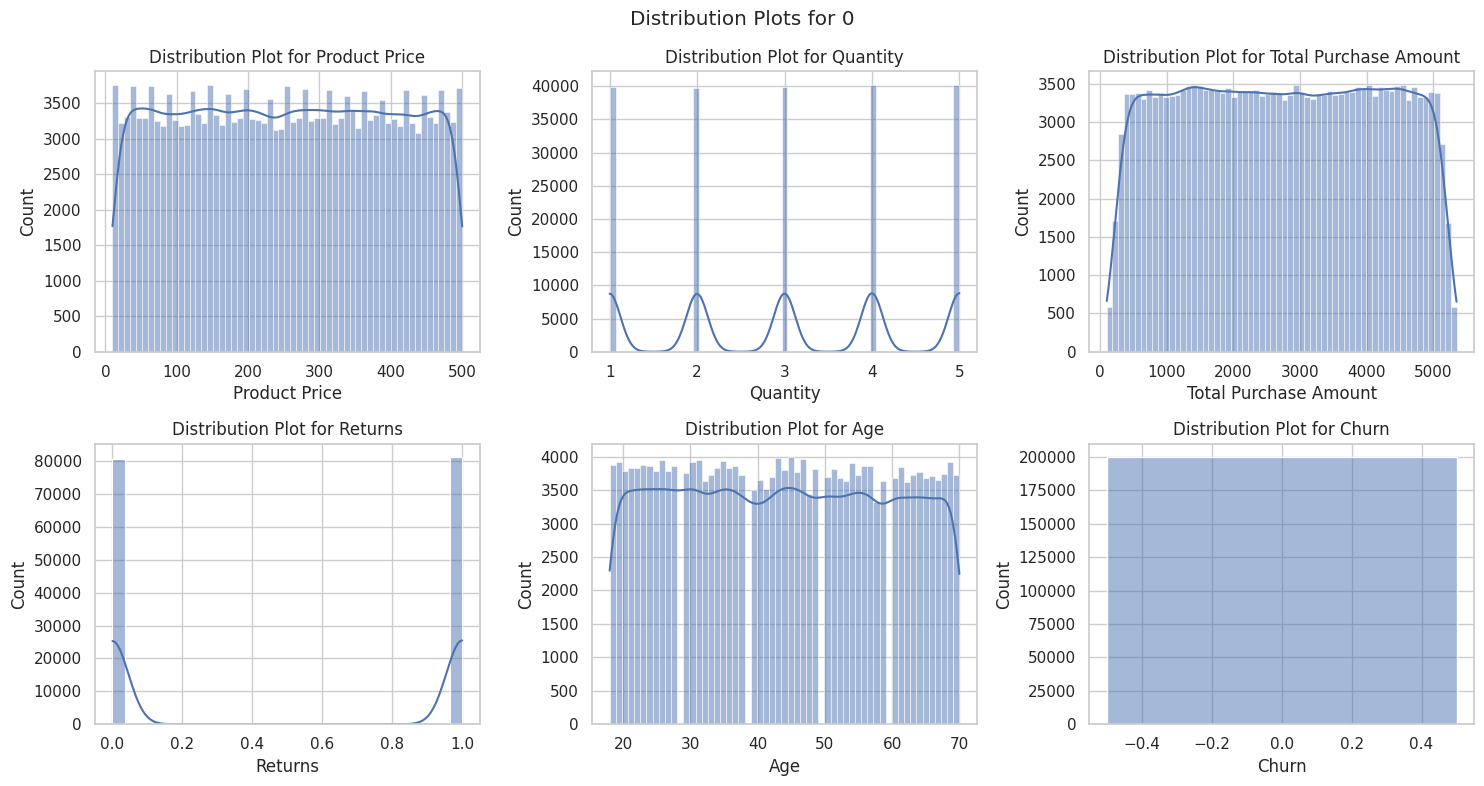

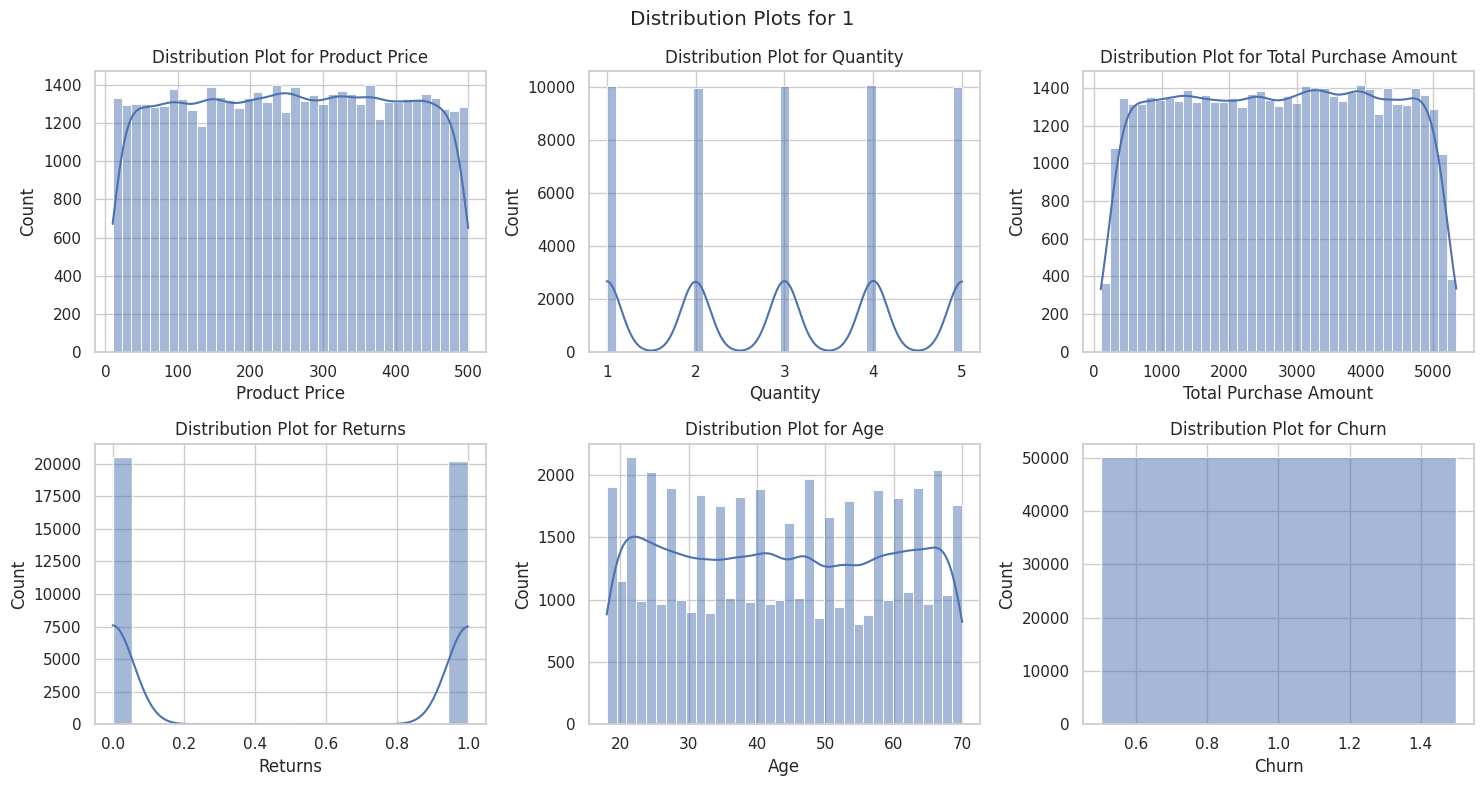

In [ ]:
# Visualization of Churn Group Statistics:

# Set the style of seaborn
sns.set(style="whitegrid")

# Loop through each unique value
for churn in df_1['Churn'].unique():
    churn_data = df_1[df_1['Churn'] == churn]

    # Set the size of the plot
    plt.figure(figsize=(15, 8))

    # Loop through each numerical column
    for numerical_column in churn_data.select_dtypes(include='number').columns:
        # Create a distribution plot for the current numerical column
        plt.subplot(2, 3, list(churn_data.select_dtypes(include='number').columns).index(numerical_column) + 1)
        sns.histplot(data=churn_data, x=numerical_column,kde=True)

        # Set the title of the plot
        plt.title(f'Distribution Plot for {numerical_column}')

    # Set the title of the plots
    plt.suptitle(f'Distribution Plots for {churn}')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()


# One Hot Encoding Categorical Columns:

In [5]:
from sklearn.preprocessing import OneHotEncoder


# Identify categorical columns
categorical_columns = df_1.select_dtypes(include=['object']).columns

# Create a OneHotEncoder instance with drop='first'
encoder = OneHotEncoder(drop='first')

# Apply one-hot encoding to the categorical columns
encoded_data = encoder.fit_transform(df_1[categorical_columns].astype(str))

# Convert the sparse matrix to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the new DataFrame with the original DataFrame
df_encoded = pd.concat([df_1, encoded_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting DataFrame
df_encoded


,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male
0,177,1,2427,1.0,31,0,0.0,0.0,1.0,0.0,1.0,0.0
1,174,3,2448,1.0,31,0,0.0,1.0,0.0,0.0,1.0,0.0
2,413,1,2345,1.0,31,0,0.0,0.0,0.0,1.0,0.0,0.0
3,396,3,937,0.0,31,0,0.0,1.0,0.0,0.0,0.0,0.0
4,259,4,2598,1.0,31,0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,436,1,3664,0.0,63,0,0.0,0.0,1.0,0.0,0.0,1.0
249996,233,1,4374,1.0,66,0,0.0,1.0,0.0,1.0,0.0,0.0
249997,441,5,5296,NaN,63,0,0.0,1.0,0.0,0.0,0.0,0.0
249998,44,2,2517,1.0,64,0,0.0,1.0,0.0,0.0,0.0,1.0


# Handling Missing Values:

In [6]:
# Missing Value Handling (With Machine Learning Model):
# The returns column has values of only ones and zeros. That is why we will use Random Forest Classification to predict the null values.

from sklearn.ensemble import RandomForestClassifier

# Split the DataFrame into two parts: one with non-null values and one with null values
df_train = df_encoded.dropna()
df_predict = df_encoded[df_encoded['Returns'].isnull()]

# Extract features and target variable from the training data
x_train = df_train.drop(columns= 'Returns')
y_train = df_train['Returns']

# Create a logistic regression model
model = RandomForestClassifier()

# Train the model
model.fit(x_train, y_train)

# Use the trained model to predict missing values
predicted_values = model.predict(df_predict.drop('Returns', axis=1))

# Fill the missing values with the predicted values
df_encoded.loc[df['Returns'].isnull(), 'Returns'] = predicted_values

# Display the DataFrame after filling missing values
print("DataFrame after filling missing values:")

df_encoded



DataFrame after filling missing values:


,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male
0,177,1,2427,1.0,31,0,0.0,0.0,1.0,0.0,1.0,0.0
1,174,3,2448,1.0,31,0,0.0,1.0,0.0,0.0,1.0,0.0
2,413,1,2345,1.0,31,0,0.0,0.0,0.0,1.0,0.0,0.0
3,396,3,937,0.0,31,0,0.0,1.0,0.0,0.0,0.0,0.0
4,259,4,2598,1.0,31,0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,436,1,3664,0.0,63,0,0.0,0.0,1.0,0.0,0.0,1.0
249996,233,1,4374,1.0,66,0,0.0,1.0,0.0,1.0,0.0,0.0
249997,441,5,5296,0.0,63,0,0.0,1.0,0.0,0.0,0.0,0.0
249998,44,2,2517,1.0,64,0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_encoded.isnull().sum()

Product Price                   0
Quantity                        0
Total Purchase Amount           0
Returns                         0
Age                             0
Churn                           0
Product Category_Clothing       0
Product Category_Electronics    0
Product Category_Home           0
Payment Method_Credit Card      0
Payment Method_PayPal           0
Gender_Male                     0
dtype: int64

In [7]:
# Convert the 'Returns' column from float to int
df_encoded['Returns'] = df_encoded['Returns'].astype(int)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Product Price                 250000 non-null  int64  
 1   Quantity                      250000 non-null  int64  
 2   Total Purchase Amount         250000 non-null  int64  
 3   Returns                       250000 non-null  int64  
 4   Age                           250000 non-null  int64  
 5   Churn                         250000 non-null  int64  
 6   Product Category_Clothing     250000 non-null  float64
 7   Product Category_Electronics  250000 non-null  float64
 8   Product Category_Home         250000 non-null  float64
 9   Payment Method_Credit Card    250000 non-null  float64
 10  Payment Method_PayPal         250000 non-null  float64
 11  Gender_Male                   250000 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 22.9 M

# Checking for any Outliers:

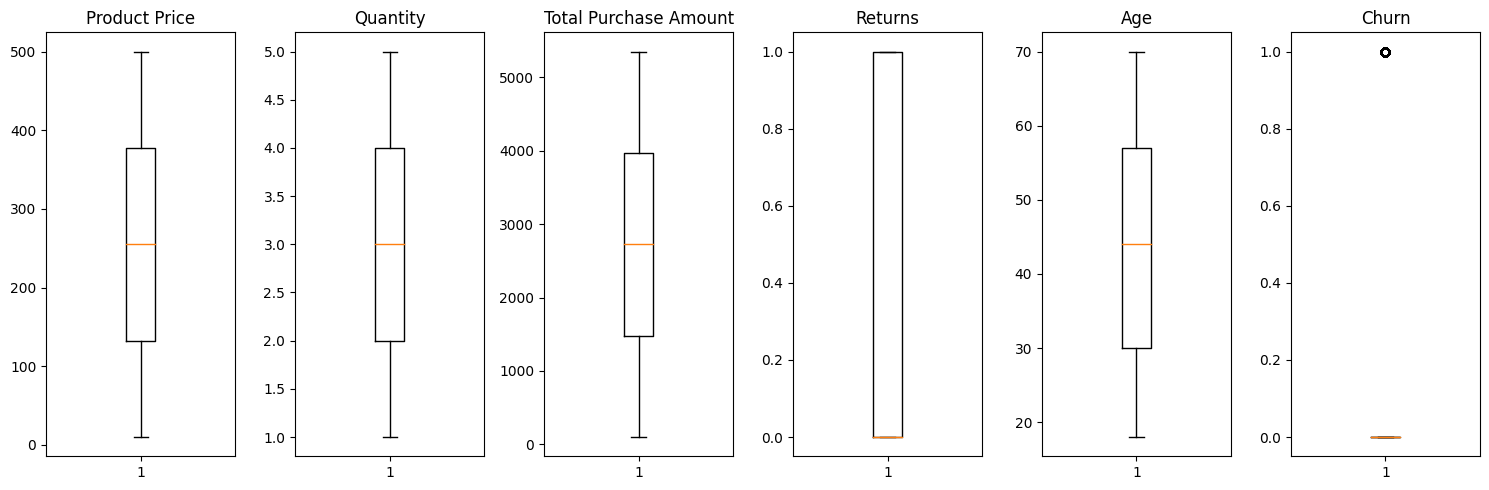

In [ ]:
# Box plot for outliers check

# Select numerical columns
numerical_columns = df_encoded.select_dtypes(include='int64').columns

# Calculate the number of subplots based on the number of numerical columns
num_plots = len(numerical_columns)

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(15, 5))

# Create boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    axes[i].boxplot(df_encoded[col])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



#Feature Engineering

In [8]:
# Train Test Split:

x = df_encoded.drop(columns = 'Churn')
y = df_encoded['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [9]:
# Feature Scaling (using Standard Scaler)
# Scale numerical features to have a mean of 0 and standard deviation of 1

from sklearn.preprocessing import StandardScaler

numerical_columns = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Age']
scaler = StandardScaler()
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])


In [ ]:
# Checking if everything is ok or not
pd.DataFrame(x_test)

,Product Price,Quantity,Total Purchase Amount,Returns,Age,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male
38683,1.617856,1.410215,-1.031835,1,-0.051202,0.0,1.0,0.0,1.0,0.0,0.0
64939,-1.654503,-0.003352,1.442389,1,0.794671,0.0,0.0,0.0,0.0,0.0,1.0
3954,-1.280720,0.703432,-1.674995,1,-0.311471,0.0,0.0,1.0,0.0,0.0,0.0
120374,0.341354,1.410215,-0.678374,1,0.989872,0.0,0.0,0.0,1.0,0.0,1.0
172861,1.540279,-0.710135,-0.415012,1,1.510409,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
80183,-0.349791,-1.416918,-1.531531,1,-1.677880,0.0,0.0,0.0,0.0,1.0,0.0
240111,-0.004218,-1.416918,0.708439,0,0.729603,0.0,0.0,1.0,0.0,0.0,1.0
100820,0.461247,-0.710135,1.459023,1,0.989872,1.0,0.0,0.0,1.0,0.0,1.0
138362,-1.386508,0.703432,0.036170,0,1.120006,0.0,1.0,0.0,0.0,1.0,0.0


# Principal Component Analysis

Instead of arbitrarily choosing the number of dimensions to reduce down to, you could choose a number of dimensions that contain 95% of the variance.

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('d=',d)
# you can now set n_components = d and run PCA again

d= 9


In [11]:
pca = PCA(n_components = d)

x_train_pca = pca.fit_transform(x_train)

x_test_pca = pca.transform(x_test)

# Applying Linear Discriminant Analysis (Only for Classification Problems):

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(x_train_pca, y_train)
cumsum = np.cumsum(lda.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('d=',d)
# you can now set n_components = d and run LDA again

d= 1


In [13]:

lda = LDA(n_components = d)
x_train_lda = lda.fit_transform(x_train_pca, y_train)
x_test_lda = lda.transform(x_test_pca)

# KNN Model:

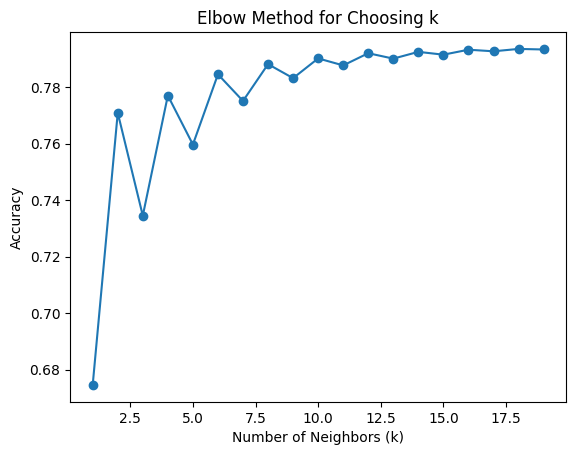

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Evaluate the model for different k values
k_values = range(1, 20)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_lda, y_train)
    y_pred = knn.predict(x_test_lda)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Choosing k')
plt.show()


In [31]:
# training KNN Model with training set


knn = KNeighborsClassifier(n_neighbors = 10, metric='minkowski', p=2)

knn.fit(x_train_lda, y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report

y_pred_knn = knn.predict(x_test_lda)

print(classification_report(y_test, y_pred_knn, zero_division=1))


              precision    recall  f1-score   support

           0       0.79      0.99      0.88     19854
           1       0.19      0.01      0.01      5146

    accuracy                           0.79     25000
   macro avg       0.49      0.50      0.45     25000
weighted avg       0.67      0.79      0.70     25000



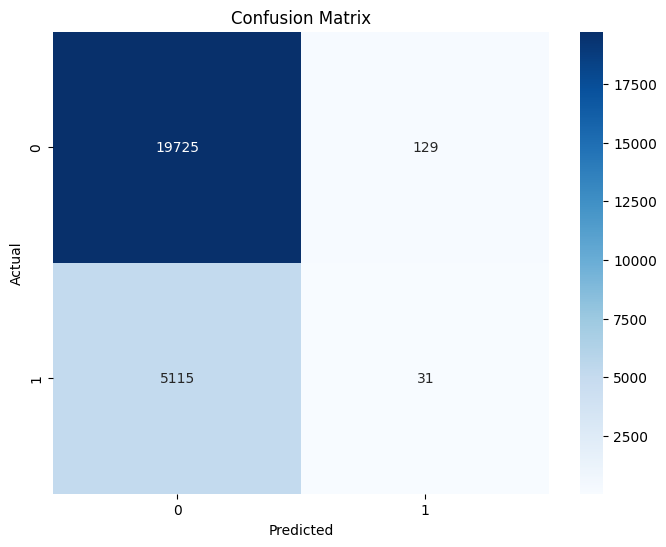

In [34]:
# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
# K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X= x_train_lda, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.66 %
Standard Deviation: 0.06 %


# Logistic Regression Model:

In [ ]:
# train Logistic Regression with training set

from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(x_train_lda, y_train)


# Predict New Result with test set

y_pred_LGR = LGR.predict(x_test_lda)

# Classification Report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_LGR))


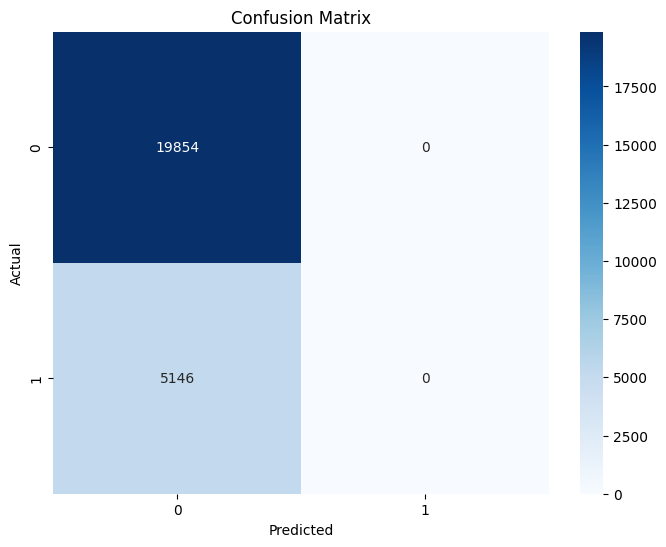

In [29]:
# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_LGR)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LGR, X = x_train_lda, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.01 %
Standard Deviation: 0.00 %


# Naive Bayes Model:

In [35]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train_lda, y_train)

# Predict New Result with test set

y_pred_NB = NB.predict(x_test_lda)
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89     19854
           1       0.00      0.00      0.00      5146

    accuracy                           0.79     25000
   macro avg       0.40      0.50      0.44     25000
weighted avg       0.63      0.79      0.70     25000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


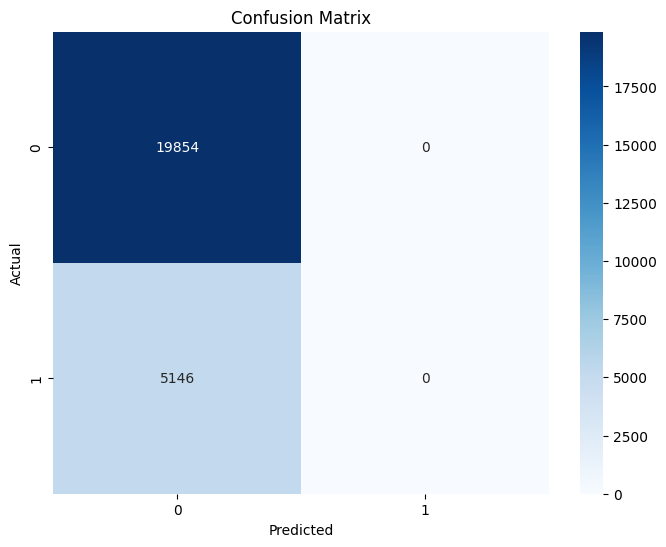

In [37]:
# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_NB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = NB, X = x_train_lda, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.01 %
Standard Deviation: 0.00 %


# XG Boost Model:

In [38]:
# Implementing XGBoost on the training set

from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(x_train_lda, y_train)

# Predict New Result with test set

y_pred_XGBC = XGBC.predict(x_test_lda)
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_XGBC, zero_division=1))



# K Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = XGBC, X = x_train_lda, y = y_train, cv = 10)
print("K- Fold Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("K- Fold Standard Deviation: {:.2f} %".format(accuracies.std()*100))


              precision    recall  f1-score   support

           0       0.79      1.00      0.89     19854
           1       1.00      0.00      0.00      5146

    accuracy                           0.79     25000
   macro avg       0.90      0.50      0.44     25000
weighted avg       0.84      0.79      0.70     25000

K- Fold Accuracy: 80.01 %
K- Fold Standard Deviation: 0.00 %


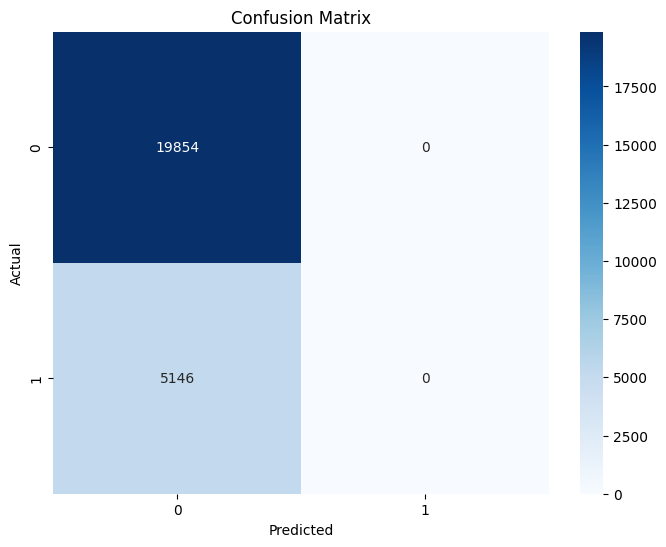

In [39]:
# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_XGBC)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Artificial Neural Network (ANN) Model:

In [40]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_train_lda, y_train, batch_size = 32, epochs = 5)



Epoch 1/5
7032/7032 [==============================] - 9s 1ms/step - loss: 0.5024 - accuracy: 0.8001
Epoch 2/5
7032/7032 [==============================] - 9s 1ms/step - loss: 0.5006 - accuracy: 0.8001
Epoch 3/5
7032/7032 [==============================] - 8s 1ms/step - loss: 0.5005 - accuracy: 0.8001
Epoch 4/5
7032/7032 [==============================] - 9s 1ms/step - loss: 0.5005 - accuracy: 0.8001
Epoch 5/5
7032/7032 [==============================] - 17s 2ms/step - loss: 0.5005 - accuracy: 0.8001


<Axes: >

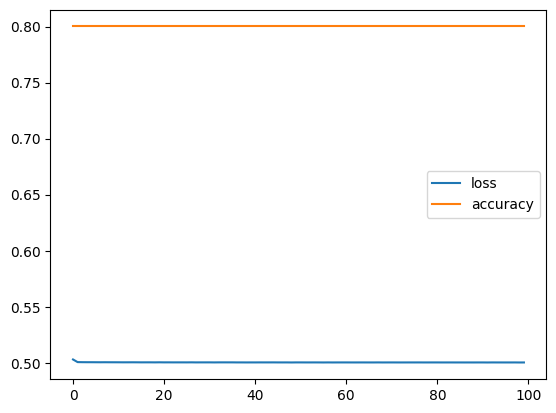

In [ ]:
loss_df = pd.DataFrame(ann.history.history)
loss_df.plot() # to know how many epochs is enough once loss plot becomes flat

782/782 [==============================] - 1s 832us/step
              precision    recall  f1-score   support

           0       0.79      1.00      0.89     19854
           1       1.00      0.00      0.00      5146

    accuracy                           0.79     25000
   macro avg       0.90      0.50      0.44     25000
weighted avg       0.84      0.79      0.70     25000



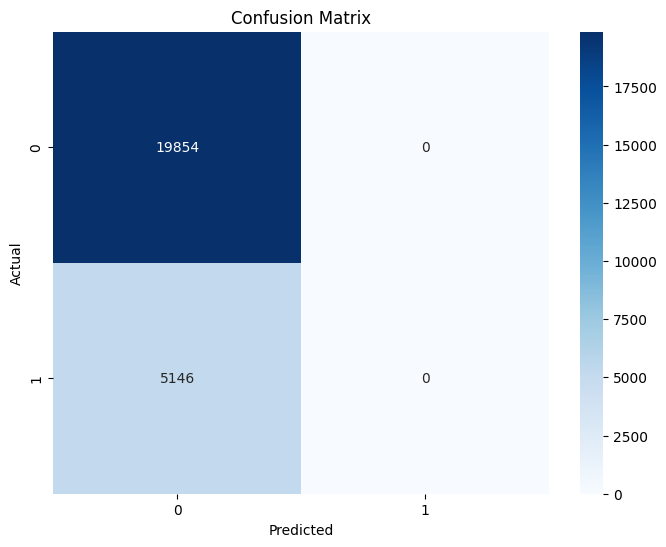

In [41]:
y_pred_ann = ann.predict(x_test_lda)
y_pred_ann = (y_pred_ann > 0.5)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ann, zero_division=1))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_ann)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.12.0

In [ ]:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold



# Function to create the model
def create_model():
    # Replace this with your model creation code
    model = tf.keras.models.Sequential()
    # Add your layers
    model.add(tf.keras.layers.Dense(units=6, activation='relu'))
    model.add(tf.keras.layers.Dense(units=6, activation='relu'))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier with your model-building function
model = KerasClassifier(build_fn=create_model, batch_size=32, nb_epoch=5)


# Use StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
accuracies = cross_val_score(estimator=model, X=x_train_lda, y=y_train, cv=kfold, n_jobs= -1)

# Print the results
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))


<ipython-input-41-e0ed7df29aed>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, batch_size=32, nb_epoch=5)


Accuracy: 80.01 %
Standard Deviation: 0.00 %


#Model Selection:

For customer churn analysis, the choice of evaluation criteria depends on the specific goals and priorities of your business. Each metric provides different insights into the model's performance, and the appropriate metric may vary based on the business context. Here's a brief explanation of each metric and its relevance to customer churn analysis:

***Accuracy:***

Definition: The ratio of correctly predicted instances to the total instances.

Use Case: Accuracy is a common metric, but it might not be the most suitable for imbalanced datasets, such as those in customer churn analysis. If the dataset has a significant class imbalance (e.g., more non-churn instances than churn instances), a high accuracy score can be misleading. It might be high simply because the model is good at predicting the majority class (non-churn) and not the minority class (churn).

Consideration: Accuracy alone may not provide a complete picture, especially when dealing with imbalanced datasets.

***Precision:***

Definition: The ratio of correctly predicted positive observations to the total predicted positives.

Use Case: Precision is the measure of how many of the predicted positive instances are actually positive. In the context of churn analysis, precision is relevant when you want to minimize false positives. For example, you want to avoid mistakenly labeling non-churn customers as churn customers.

Consideration: High precision means fewer false positives, but it may come at the cost of missing some true positives.

***Recall (Sensitivity or True Positive Rate):***

Definition: The ratio of correctly predicted positive observations to the total actual positives.

Use Case: Recall is important when the cost of missing true churn instances is high. It measures the ability of the model to capture all the positive instances, even if it results in more false positives. In churn analysis, recall helps identify as many actual churn cases as possible.

Consideration: High recall means fewer false negatives, but it may come at the cost of more false positives.

***F1 Score:***

Definition: The harmonic mean of precision and recall.

Use Case: F1 score provides a balance between precision and recall. It is suitable when you want to consider both false positives and false negatives in your evaluation. It is especially useful when there is an uneven class distribution.

Consideration: F1 score is a good overall metric for imbalanced datasets, providing a trade-off between precision and recall.

# Final Conclusion:

Taking all the evaluation criteria into perspective and also the speed of training speed, in my estimation ***NO MODEL WAS GOOD ENOUGH BECAUSE THE DATASET ITSELF IS NOT ENOUGH. WE NEED MORE DATA ABOUT THE CUSTOMERS. WE NEED MORE FEATURES ABOUT THE CUSTOMERS TO PREDICT THEIR CHURN CHANCES.***

still,
I'll select the KNN model. ***(Just to show, if everything went well how we would continue to predict unseen data using the model)***

# Saving the Model:

In [42]:
import joblib
final_model_dict = {'Numeric Columns': numerical_columns,
                    'Categorical Columns': categorical_columns,
                    'Encoder': encoder,
                    'Scaler': scaler,
                    'PCA': pca,
                    'LDA': lda,
                    'Model': knn}

joblib.dump(final_model_dict, 'Customer Churn Predictor Model.joblib')

['Customer Churn Predictor Model.joblib']

# Loading the Model:

In [ ]:
my_model = joblib.load('Customer Churn Predictor Model.joblib')

In [ ]:
categorical_columns = my_model['Categorical Columns']

In [ ]:
numerical_columns = my_model['Numeric Columns']

In [ ]:
encoder = my_model['Encoder']

In [ ]:
scaler = my_model['Scaler']

In [ ]:
pca = my_model['PCA']

In [ ]:
lda = my_model['LDA']

In [ ]:
model = my_model['Model']

# Predicting Unseen Data with My Model:

***Note:*** for this i need to modify my input data into the format of x_test_lda used during my model creation and testing stage.

In [ ]:
df_1 # for seeing the format which i will input new data

,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender,Churn
0,Home,177,1,2427,PayPal,1.0,31,Female,0
1,Electronics,174,3,2448,PayPal,1.0,31,Female,0
2,Books,413,1,2345,Credit Card,1.0,31,Female,0
3,Electronics,396,3,937,Cash,0.0,31,Female,0
4,Books,259,4,2598,PayPal,1.0,31,Female,0
...,...,...,...,...,...,...,...,...,...
249995,Home,436,1,3664,Cash,0.0,63,Male,0
249996,Electronics,233,1,4374,Credit Card,1.0,66,Female,0
249997,Electronics,441,5,5296,Cash,NaN,63,Female,0
249998,Electronics,44,2,2517,Cash,1.0,64,Male,0


Let's just input some random values to see if my model works or not.

In [ ]:
new_input = {'Product Category': 'Home' ,
             'Product Price':	650,
             'Quantity': 3 ,
             'Total Purchase Amount': 5732 ,
             'Payment Method': 'Credit Card',
             'Returns': 0,
             'Age': 55,
             'Gender': 'Male'
}

input_df =pd.DataFrame([new_input])
input_df

,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender
0,Home,650,3,5732,Credit Card,0,55,Male


In [ ]:
# Step-1: Encoding Categorical Data

# Apply one-hot encoding to the categorical columns
encoded_data = encoder.transform(input_df[categorical_columns].astype(str))

# Convert the sparse matrix to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the new DataFrame with the original DataFrame
input_df_encoded = pd.concat([input_df, encoded_df], axis=1)

# Drop the original categorical columns
input_df_encoded = input_df_encoded.drop(categorical_columns, axis=1)

# Display the resulting DataFrame
input_df_encoded

,Product Price,Quantity,Total Purchase Amount,Returns,Age,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male
0,650,3,5732,0,55,0.0,0.0,1.0,1.0,0.0,1.0


In [ ]:
# Step-2: Feature Scale the Numerical Data

input_df_encoded[numerical_columns] = scaler.transform(input_df_encoded[numerical_columns])
input_df_scaled = input_df_encoded


In [ ]:
input_df_scaled

,Product Price,Quantity,Total Purchase Amount,Returns,Age,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Credit Card,Payment Method_PayPal,Gender_Male
0,2.788571,-0.003352,2.08347,0,0.729603,0.0,0.0,1.0,1.0,0.0,1.0


In [ ]:
# Step-3 & 4 : Do Principal Component Analysis and Linear Discriminant Analysis to Reduce Dimensions and Find the Best Linear Combination for Classification

input_df_pca = pca.transform(input_df_scaled)
input_df_lda = lda.transform(input_df_pca)


In [ ]:
# Final Step : Predict and Take Future Business Decisions

# Predict New Result with test set

pred = model.predict(input_df_lda)

if pred==0:
  print('Will Not Churn')
else:
  print('Will Churn')

Will Not Churn
